# Хакатон Моторика

## Задача 3

## Загрузка данных

In [1]:
import numpy as np, pandas as pd, pickle as pkl
# %matplotlib widget
# import seaborn as sns
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow.keras.metrics import Precision, Recall
from tensorflow_addons.metrics import F1Score
from sklearn.model_selection import train_test_split

2022-10-19 22:02:59.548241: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
#mounts = {
#    1 : {
#        'path_train'  : './Data/Train04_1.npy',
#        'path_target' : './Data/Target04_1.npy',
#        'path_test'   : './Data/Test04_1.pkl',
#    },
#    2 : {
#        'path_train'  : './Data/Train04_2.npy',
#        'path_target' : './Data/Target04_2.npy',
#        'path_test'   : './Data/Test04_2.pkl',
#    },
#    3 : {
#        'path_train'  : './Data/Train04_3.npy',
#        'path_target' : './Data/Target04_3.npy',
#        'path_test'   : './Data/Test04_3.pkl',
#    }
#}

SET_NUM = '08'
mounts = {}
for i in range(1,4):
    mount = {}
    mount['path_train'] = './Data/Train'+SET_NUM+'_'+str(i)+'.npy'
    mount['path_target'] = './Data/Target'+SET_NUM+'_'+str(i)+'.npy'
    mount['path_test'] = './Data/Test'+SET_NUM+'_'+str(i)+'.pkl'
    mounts[i] = mount
print(mounts)

{1: {'path_train': './Data/Train08_1.npy', 'path_target': './Data/Target08_1.npy', 'path_test': './Data/Test08_1.pkl'}, 2: {'path_train': './Data/Train08_2.npy', 'path_target': './Data/Target08_2.npy', 'path_test': './Data/Test08_2.pkl'}, 3: {'path_train': './Data/Train08_3.npy', 'path_target': './Data/Target08_3.npy', 'path_test': './Data/Test08_3.pkl'}}


In [3]:
RANDOM_SEED = 42

In [4]:
for mount_name, mount in mounts.items():
    mount['train'] = np.swapaxes(np.load(mount['path_train']),1,2)
    mount['target'] = tf.keras.utils.to_categorical(np.load(mount['path_target']))
    print('Mount#:', mount_name)
    print('Train shape:', mount['train'].shape)
    print('Target shape:', mount['target'].shape)
    with open(mount['path_test'], 'rb') as f:
        test = pkl.load(f)
    print('Test size:', len(test))
    rev_test = list()
    for t in test:
      rev_test.append(np.swapaxes(t,0,1))
    mount['test'] = rev_test
    #print(test[0].shape)
    #print(rev_test[0].shape)

Mount#: 1
Train shape: (344, 45, 16)
Target shape: (344, 45, 5)
Test size: 899
Mount#: 2
Train shape: (321, 45, 16)
Target shape: (321, 45, 5)
Test size: 855
Mount#: 3
Train shape: (333, 45, 16)
Target shape: (333, 45, 5)
Test size: 861


Motorica/Task_03/Data/Train04_1.npy

In [5]:
#   подготовка валидационной выборки
for mname, mount in mounts.items():
    #X_train = mount['train']
    #y_train = mount['target']
    X_trn, X_val, y_trn, y_val = train_test_split(mount['train'], mount['target'], test_size=0.15, shuffle=True, random_state=RANDOM_SEED)
    print('Mount:', mname, 'X_trn:', X_trn.shape, 'y_trn:', y_trn.shape)
    print('Mount:', mname, 'X_val:', X_val.shape, 'y_val:', y_val.shape)
    mount['X_trn'] = X_trn
    mount['X_val'] = X_val
    mount['y_trn'] = y_trn
    mount['y_val'] = y_val

Mount: 1 X_trn: (292, 45, 16) y_trn: (292, 45, 5)
Mount: 1 X_val: (52, 45, 16) y_val: (52, 45, 5)
Mount: 2 X_trn: (272, 45, 16) y_trn: (272, 45, 5)
Mount: 2 X_val: (49, 45, 16) y_val: (49, 45, 5)
Mount: 3 X_trn: (283, 45, 16) y_trn: (283, 45, 5)
Mount: 3 X_val: (50, 45, 16) y_val: (50, 45, 5)


## Построение модели

In [6]:
m = mounts[1]
_, n_ts, n_chan = m['train'].shape
out_units = m['target'].shape[-1]
print(f"input_shape = {(n_ts, n_chan)} | output_units = {out_units}")

input_channels = x = tf.keras.layers.Input(shape=(n_ts, n_chan))

# x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.SimpleRNN(
    units=180,  #180
    return_sequences=True,
    recurrent_regularizer=tf.keras.regularizers.L1L2(l1=1e-3, l2=1e-2),
)(x)
#x = tf.keras.layers.SimpleRNN(
#    units=180,
#    return_sequences=True,
#    recurrent_regularizer=tf.keras.regularizers.L1L2(l1=1e-3, l2=1e-2),
#)(x)

#x = tf.keras.layers.Dense(units=25, 
#                          activation='relu', 
#                          bias_regularizer=tf.keras.regularizers.l2(1e-4), 
#                          activity_regularizer=tf.keras.regularizers.l2(1e-5))(x)
#x = tf.keras.layers.BatchNormalization()(x)
#x = tf.keras.layers.Dropout(0.1)(x)

output = tf.keras.layers.Dense(units=out_units, activation='sigmoid')(x)

model = tf.keras.Model(
    inputs=input_channels,
    outputs=output,
    name="Model"
)

model.summary()

input_shape = (45, 16) | output_units = 5
Model: "Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 45, 16)]          0         
                                                                 
 simple_rnn (SimpleRNN)      (None, 45, 180)           35460     
                                                                 
 dense (Dense)               (None, 45, 5)             905       
                                                                 
Total params: 36,365
Trainable params: 36,365
Non-trainable params: 0
_________________________________________________________________


2022-10-19 22:03:05.774793: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Создание стартового состояния

Модель обычно инициируется при запуске некоторыми случайными весами. Можно попробовать сохранять модель после обучения одну первую эпоху и в дальнейшем начинать обучение с этого набора весов. 

### Обучение модели

In [7]:
for mname, mount in mounts.items():
    X_train = mount['train']
    #y_train = mount['target']
    X_trn = mount['X_trn']
    X_val = mount['X_val']
    y_trn = mount['y_trn']
    y_val = mount['y_val']

    tf.keras.utils.set_random_seed(RANDOM_SEED)
    
    m = tf.keras.models.clone_model(model)
    m.compile( 
        loss= "mean_squared_error", #"categorical_crossentropy",  #"mean_squared_error",
        metrics= [Precision(name='precision'), Recall(name='recall')],  #[F1Score(num_classes=5),],
        optimizer=tf.keras.optimizers.Adam(),
    )
    
    history = m.fit(
        X_trn,
        y_trn, 
        epochs=300,
        verbose=0,
        validation_data= (X_val, y_val)
        #validation_split=0.15
    )
    
    y_pred = m.predict(X_train)
    #print(y_pred.shape)
    
    mount['history'] = history
    mount['model'] = m
    mount['pred_train'] = y_pred

11/11 [==============================] - 0s 7ms/step


### Визуализация и постобработка

In [8]:
def calc_f1score(precision, recall):
    '''
    Рассчет и возврат значения F1score на основе precision и recall
    '''
    f1 = []
    for i in range(len(precision)):
        f1 += [ 2 * precision[i] * recall[i] / (precision[i] + recall[i])] 
    return f1

In [9]:
# print(mounts[1]['history'].history.keys())

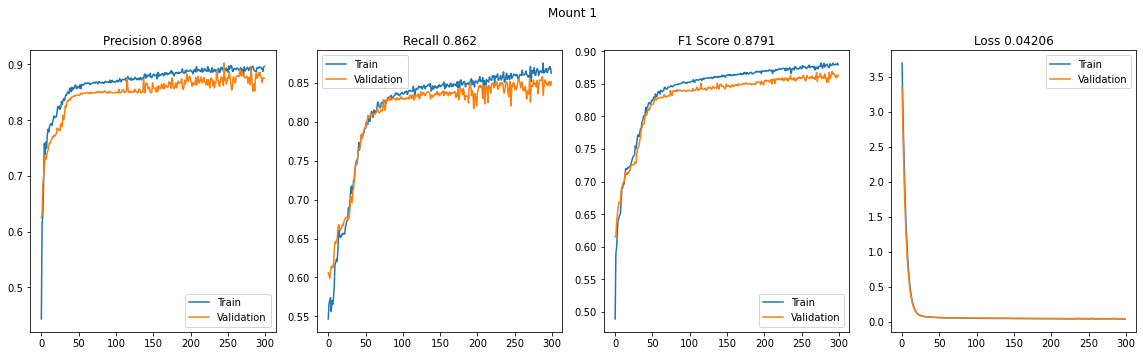

Validation F1 Score 0.8631


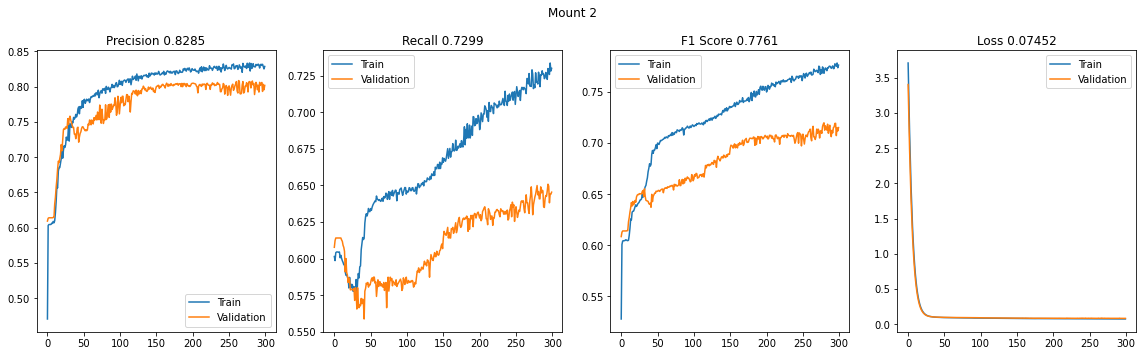

Validation F1 Score 0.7151


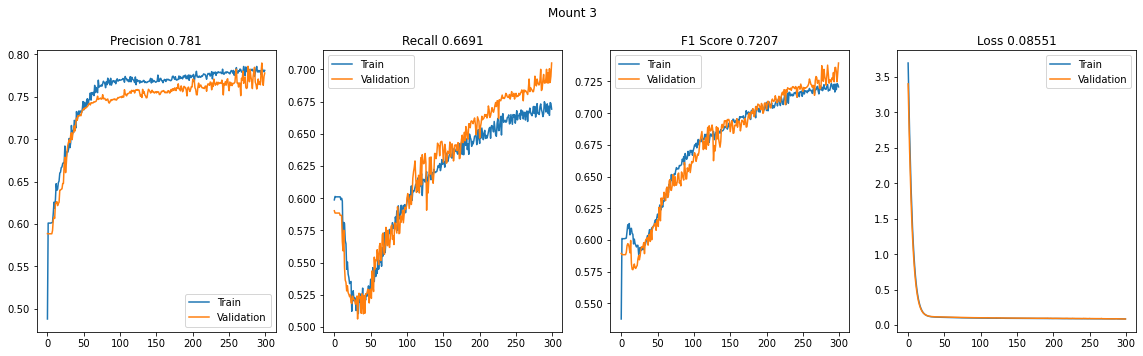

Validation F1 Score 0.7396
Average (validation) F1 score 0.7726


In [10]:
for m in mounts.keys(): 
    h = mounts[m]['history']
    rec = h.history['recall']
    prec = h.history['precision']
    f1sc = calc_f1score(rec,prec)
    val_f1score = calc_f1score(h.history['val_recall'], h.history['val_precision'])
    loss = h.history['loss']
    mounts[m]['val_F1Score'] = val_f1score[-1]
    # print(f1sc)
    fig, axx = plt.subplots(1,4, figsize=(16,5))

    axx[0].plot(prec, label='Train')
    axx[0].plot(h.history['val_precision'], label = 'Validation')
    axx[0].set_title(f'Precision {prec[-1]:.4}')
    axx[0].legend(loc='best')

    axx[1].plot(rec, label = 'Train')
    axx[1].plot(h.history['val_recall'], label = 'Validation')
    axx[1].set_title(f'Recall {rec[-1]:.4}')
    axx[1].legend(loc='best')

    axx[2].plot(f1sc, label = 'Train')
    axx[2].plot(val_f1score, label = 'Validation')
    axx[2].set_title(f'F1 Score {f1sc[-1]:.4}')
    axx[2].legend(loc='best')

    axx[3].plot(loss, label = 'Train')
    axx[3].plot(h.history['val_loss'], label = 'Validation')
    axx[3].set_title(f'Loss {loss[-1]:.4}')
    axx[3].legend(loc='best')

    plt.suptitle(f'Mount {m}')
    plt.tight_layout()
    plt.show();
    print(f'Validation F1 Score {val_f1score[-1]:.4}')


average_f1score = sum([ mounts[m]['val_F1Score'] for m in mounts.keys()]) / 3.0 
print(f'Average (validation) F1 score {average_f1score:.4}')

In [11]:
from sklearn.metrics import precision_recall_fscore_support

In [12]:
for mname, mount in mounts.items():
    val_F1Score = mount['val_F1Score']
    y_actual = mount['target'].argmax(axis=-1).flatten()
    #print(y_actual.shape)
    y_pred = mount['pred_train'].argmax(axis=-1).flatten()
    #print(y_pred.shape)
    full_prec, full_rec, full_f1score, _ = precision_recall_fscore_support(y_actual,y_pred, average='macro')
    print( f'Mount: {mname}, Validation F1-score { val_F1Score:.4f}, full set F1_score {full_f1score:.4f}')
  

Mount: 1, Validation F1-score 0.8631, full set F1_score 0.8091
Mount: 2, Validation F1-score 0.7151, full set F1_score 0.6237
Mount: 3, Validation F1-score 0.7396, full set F1_score 0.5327


/Users/genn/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/genn/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


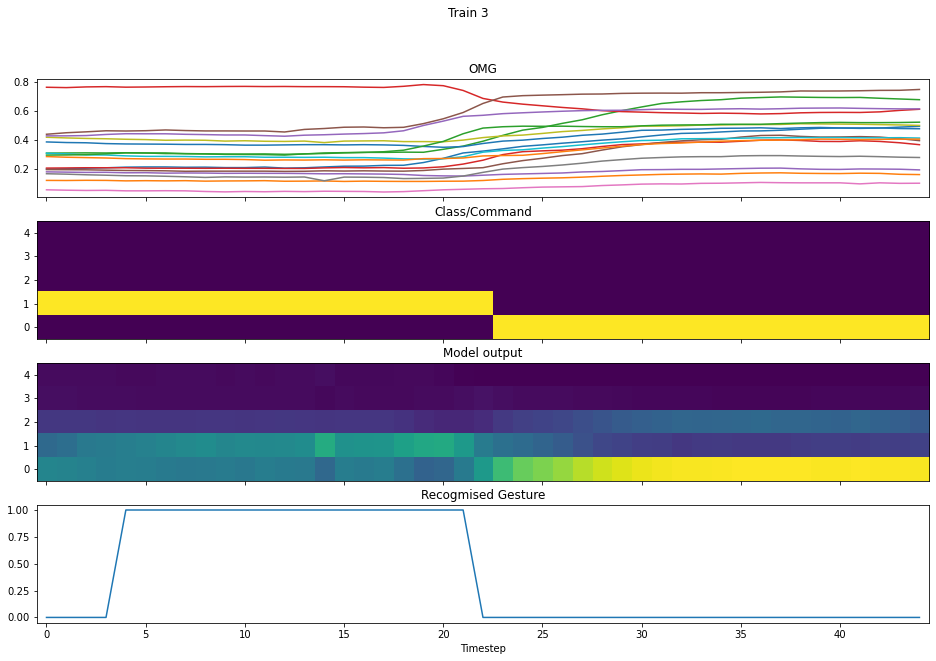

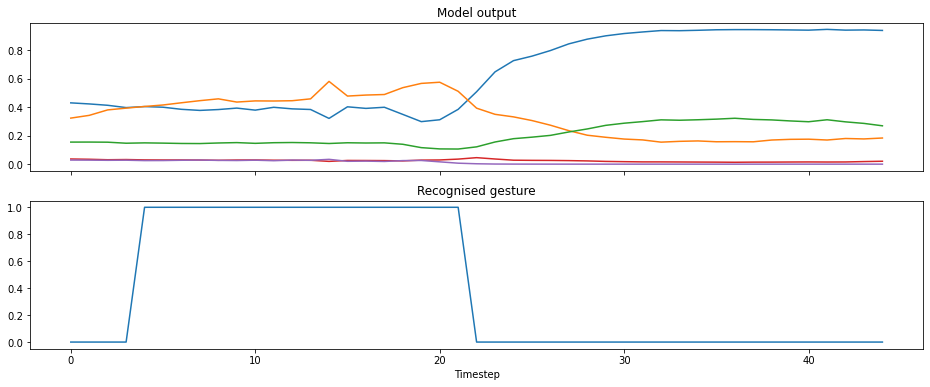

In [13]:
i = 3
m = 3 
X_train = mounts[m]['train']
y_train = mounts[m]['target']
y_pred = mounts[m]['pred_train']

fig, axx = plt.subplots(4, 1, sharex=True, figsize=(16, 10))

axx[0].plot(X_train[i])
axx[0].set_title('OMG')

axx[1].imshow(y_train[i].T, origin="lower")
#axx[1].plot(y_train[i])
axx[1].set_aspect('auto')
axx[1].set_title('Class/Command')
#axx[1].set_yticks(np.arange(5),['Open', 'Pistol', 'Thumb', 'OK', 'Grab'] )

axx[2].imshow(y_pred[i].T, origin="lower") # , vmin=-0.5, vmax=0.5
axx[2].set_aspect('auto')
axx[2].set_title('Model output')
#axx[2].set_yticks( np.arange(5), ['Open', 'Pistol', 'Thumb', 'OK', 'Grab'] )

axx[3].plot(y_pred[i].argmax(axis=-1))
axx[3].set_aspect('auto')
axx[3].set_title('Recogmised Gesture')
#axx[3].set_yticks( np.arange(5), ['Open', 'Pistol', 'Thumb', 'OK', 'Grab'] )
axx[3].set_xlabel('Timestep')

plt.suptitle(f'Train {i}')
# plt.tight_layout()
#plt.gcf()
plt.show();

fig,axx = plt.subplots(2,1, sharex=True, figsize = (16,6))
axx[0].plot(y_pred[i])
axx[0].set_title('Model output')

axx[1].plot(y_pred[i].argmax(axis=-1))
axx[1].set_title('Recognised gesture')
axx[1].set_xlabel('Timestep')

plt.show();


### Подготовка теста для kaggle

In [14]:
y_test = pd.read_csv('./Data/sample_submission.csv')

y_test[['subject_id', 'sample', 'timestep']] = (
    y_test['subject_id-sample-timestep']
    .str.split('-', 2, expand=True)
    .astype(int)
)
y_test

print(y_test.shape)
y_test.head()
# y_test.set_index(['subject_id', 'sample'])

(471610, 5)


,subject_id-sample-timestep,class,subject_id,sample,timestep
0,1-0-0,4,1,0,0
1,1-0-1,2,1,0,1
2,1-0-2,0,1,0,2
3,1-0-3,0,1,0,3
4,1-0-4,3,1,0,4


In [15]:
def add_silence(data,size):
    '''
    Добавляю тишину размера size к исходному набору данных data
    '''
    n_ts, n_sens = data.shape
    new_data = np.zeros((n_ts+size, n_sens))
    for s in range(n_sens): 
        v = data[0,s]
        new_data[:size,s] = v
        new_data[size:,s] = data[:,s]
    return new_data

In [16]:
SILENCE = 180
make_submission = True
if make_submission :
    for mount_name, mount in mounts.items():
        m = mount['model']
        # X_train = mount['train']
        X_test = mount['test']
        # print(mount_name,len(X_test))

        y_pred_test_nn = []
        for i in range(len(X_test)):
            #print(X_test[i].shape)
            #print(add_silence(X_test[i], SILENCE).shape)
            #print(add_silence(X_test[i], SILENCE)[0,:])
            # сначала добавляю тишину в начале тестового отчета - как будто модель была запущена заранее 
            # и долго работала над тишиной 
            # X_test_i = np.expand_dims(add_silence(X_test[i],SILENCE), axis=0).astype(np.float64)
            X_test_i = np.expand_dims(X_test[i], axis=0).astype(np.float64)
            #print(X_test_i.shape)
            # а теперь отрезаю только значимый кусок результата
            # y_pred_i = m.predict(X_test_i,verbose=0)[:,SILENCE:,:]
            # print(y_pred_i.shape)
            # print(y_pred_i.shape)
            # print(ewma_channels(y_pred_i,WINDOW).shape)
            y_pred_test_nn += [m.predict(X_test_i, verbose=0)] #[ewma_channels(y_pred_i, WINDOW)] #
            #y_pred_test_nn += [y_pred_i]
        
        y_pred_test = [arr.argmax(axis=-1) for arr in y_pred_test_nn]
        
        print(len(y_pred_test))
        assert len(y_pred_test) == y_test.query("subject_id == @mount_name")['sample'].nunique()
    
        mount['y_pred_test_nn'] = y_pred_test_nn
        mount['y_pred_test'] = y_pred_test

899
855
861


In [17]:
if make_submission :
    y_pred_test_res = []
    for mount_name, mount in mounts.items():
        y_pred_test_res.extend(mount['y_pred_test'])
    y_pred_test_res = np.concatenate(y_pred_test_res, axis=-1)[0]

    assert y_pred_test_res.shape[0] == y_test.shape[0]

In [18]:
#SUB_FILE = '/content/drive/MyDrive/Motorica_03/Submissions/221011_05.csv'
SUB_FILE = './Submissions/221019_05.csv'
if make_submission: 
    y_test_submit = y_test[['subject_id-sample-timestep', 'class']]
    y_test_submit['class'] = y_pred_test_res
    y_test_submit.to_csv(SUB_FILE, index=False)


/var/folders/gb/vp2kjpjj7kxgkxk0ltq2p87h0000gn/T/ipykernel_81814/4110306394.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_test_submit['class'] = y_pred_test_res


Submission Score:
- baseline + 16 sensors  Kaggle Score: 0.69086
- same as above + EWMA smoothing Window = 11 Kaggle Score: 0.57106
- same as above + Window =9 Kaggle Score: 0.57106
- same as above + Window =5 Kaggle Score: 0.57106
- то же и Window = 1 Kaggle Score 0.57106 
Возможно в сглаживании какая то  ошибка. 

- baseline + 16 sensors + Standart Scaller Kaggle Score 0.66968

### Поиск оптимальных гиперпараметров 


Исходная модель - один слой RNN (units=90) и один плотный слой.  Loss = MSE, данные нарезаны и центрированы по времени относительно пика первой производной огибающей. Целевой признак подкорректирован. 

- File_03, MinMaxScaler без сглаживания, Average F1-score 0.7579, Kaggle Score: **0.68361**
- File_04, MaxScaler без сглаживания, Average F1-score 0.6681, Kaggle Score: 0.62665
- File_05, StandardScaler без сглаживания, Average F1-Score 0.8551, Kaggle Score: 0.65713
- File_06, StandardScaler со сглаживанием в окне 5, Average F1-Score 0.8607 Kaggle Score: 0.64490
- File_07, MinMaxScaler со сглаживанием в окне 5, Average F1-Score 0.7620, Kaggle Score: 0.67238

Пробую "сохранять каждое второе" наблюдение в исходных данных.  В два раза ускоряется весь процесс
- File_08 (45 отсчетов на учебный таймфрейм), MinMaxScaler без сглаживания (окно=1), Average F1 Score  0.7600, Kaggle Score **0.68443**  
Процесс обучения сократился почти в 4 раза до 1m 40s, что радует в свете дальнейшего увеличения сложности сети и возможности более долгого обучения.  Результат обучения также слегка улучшился - по обоим метрикам относительно исходного результата систематических экспериментов. Стартовый вариант пока не удается достичь. 




Эксперименты с моделью, File_08 (45 отсчетов), MinMaxScaler без сглаживания (окно=1)

- слой RNN (units=60) и один плотный слой. Average F1 Score  0.7557
- слой RNN (units=120) и один плотный слой. Average F1 Score  0.7623
- слой RNN (units=150) и один плотный слой.  Average F1 Score 0.7645
- слой RNN (units=180) и один плотный слой.  Average F1 Score 0.7726, Kaggle Score: **0.68905**

Попробовал поработать над представлением данных для тестирования. Добавил впереди тестового набора данных кусок тишины длительностью 180 отсчетов. Была гипотеза что добавление пустых отсчетов вначале даст прирост качества распознавания.  результат остался тем же самым Score: 0.68905. 



Эксперименты с моделью, File_08 (45 отсчетов), MinMaxScaler без сглаживания (окно=1)

- **два слоя** RNN (units=180) и один плотный слой. Average F1 Score 0.8474  Kaggle Score: 0.67306 

Два слоя позволили избавиться от переобучения на наборе 2.  Но итоговый результат оказался хуже. 

- два слоя RNN (Unis = 180), плотный слой (u=256), batch_normalisation, dropout(0.25) и неизменный выходной плотный слой.  Average F1 Score 0.9208, Kaggle Score: 0.59383  

Разочарование. 


Согласовал с организаторами возможность использования MinMaxScaler, обученного на наборе тестовых и исходных данных.

File 09 - 45 отсчетов на фрейм, запретный MinMaxScaler без сглаживания. 

- Исходная модель - один слой RNN (units=90) и один плотный слой.  Loss = MSE  Av.F1 Score 0,7577 Kaggle Score: 0.67502
- Один слой RNN (Units = 180) и один плотный слой  Av.F1 0.7707, Kagle Score Score: **0.68717**
- Два слоя RNN (units=180) и один плотный слой. Average F1 Score 0.8427  Kaggle Score: 0.66965  
- Два слоя RNN (units = 180), плотный слой (u=25), batch_normalisation, dropout(0.25) и неизменный выходной плотный слой.  AvF1 Score 0.8657, Kaggle Score: 0.64317

File 08 
- слой RNN (units=180) и один плотный слой.  Average F1 Score 0.7726, Kaggle Score: **0.68905**

Оказалось, что более предпостителен набор данных 08 